In [54]:
import pandas as pd
import csv

finding out how many lines need to be skipped to create a file with just the datasets

In [1]:
text = open("GS-series-matrix.txt", "r")
line = 0
description = []
for x in text:
    if "!Sample_title" in x:
        print("sample title")
        sample_types = x
        
    if "!Sample_geo_accession" in x:
        print("sample geo accession")
        samples_geo = x
    line = line + 1

    if "!Sample_description" in x:
        description.append(x)

# print(line)
text.close()


sample title
sample geo accession


parsing through cancer types and the numbers for each

In [2]:
# removed the unnecessary code from the beginning of string
type_remove = "!Sample_title\t"
geo_remove = "!Sample_geo_accession\t"
sample_types1 = sample_types.replace(type_remove,"")
sample_geo1 = samples_geo.replace(geo_remove,"")

#creating list of both the cancer types & geo accessions
# types = sample_types1.split("\t")
# geos = sample_geo1.split("\t")
can_type = [item.strip() for item in sample_types1.split("\t")]
geos = [item.strip() for item in sample_geo1.split("\t")]


# print(len(can_type))

can_num ={} # dictionary that contains all the cancers in the dataset, along with their unique patient numbers
cancers = [] # list to contain all the cancers in the dataset, repeats are present
geo = [] # list to contain all the geo_accession that belong to each cancer patiente type

# loop that delimits each cancer in samples list, and populates the can_num dictionary and cancers list
for x in can_type:
    samples = x.strip()[1:-1].split("-")
    cancers.append(samples[0])
    can_num[samples[1]] = samples[0]

for y in geos:
    geo.append(y)

cancer2geo = dict(zip(geos,can_num.values()))

#print(cancers)
# modify this function to create a dictionary that holds each the cancer and the # of times it appears in the dataset
def filter(list):
    #
    unique = []
    num_cancers = {}

    for x in list:
        if x not in unique:
            unique.append(x)
            num_cancers[x] = 1
        else:
            num_cancers[x] += 1
    return unique, num_cancers

uniCan, can_num2 = filter(cancers)
#type(list(can_num2.keys())[0])
print(len(uniCan))


186


finding the maximum and lowest number of cancers

In [3]:
def maxCan(dictionary, num):
    tempdic = dictionary.copy()
    tempUniCan = uniCan.copy()
    dic = {} # hold the top max num of cancers

    while num > 0:
        x_max = 0
        max_key = None
        
        for x in tempUniCan:
            if tempdic[x] > x_max:
                x_max = tempdic[x]
                max_key = x
        
        if max_key:
            dic[max_key] = x_max
            tempdic.pop(max_key)
            tempUniCan.remove(max_key)
        
        num -= 1 
    
    return dic

def minCan(dictionary, num):
    tempdic = dictionary.copy()
    tempUniCan = uniCan.copy()
    dic = {} # hold the top max num of cancers

    while num > 0:
        x_min = 351
        min_key = None

        for x in tempUniCan:
            if tempdic[x] < x_min:
                x_min = tempdic[x]
                min_key = x

        if min_key:
            dic[min_key] = x_min
            tempdic.pop(min_key)
            tempUniCan.remove(min_key)
        
        num -= 1
    
    return dic


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

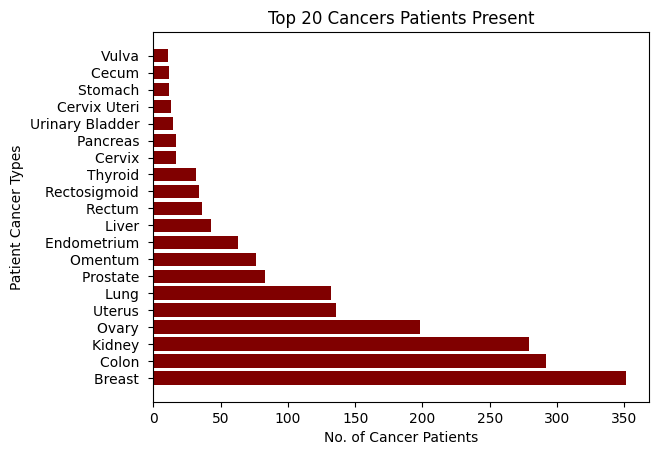

In [5]:
twentyBigCancers = maxCan(can_num2, 20)
# Plotting
plt.ylabel("Patient Cancer Types")
plt.xlabel("No. of Cancer Patients")
plt.title("Top 20 Cancers Patients Present")
plt.barh(list(twentyBigCancers.keys()), list(twentyBigCancers.values()), color='maroon')
plt.show()


In [6]:
twentySmallCancers = minCan(can_num2, 20)
# plt.ylabel("Patient Cancer Types")
# plt.xlabel("No. of Cancer Patients")
# plt.title("Lowest 20 Cancers Patients Present")
# plt.barh(list(twentySmallCancers.keys()), list(twentySmallCancers.values()), color='maroon')
# plt.show()

next step ... looking to see if all cancers have their descriptions present

In [7]:
# the objective is read the og txt file and just get the !sample_description portion of that and sorta parsing it, 
# maybe quick result would be to use true/false to see if the description is present for a partincular cancer, this 
# could late be useful information of something to consider future observation

text = open("GS-series-matrix.txt", "r")
line = 0
description = []
for x in text:
    if "!Sample_description" in x:
        description.append(x)

# print(line)
text.close()

In [8]:
# 32 lines of description, some need to be filtered out
description
description2 = []
description_Type = []
# descriptionCount = 
toBeRemoved = "!Sample_description\t"
for x in description:
    x = x.replace(toBeRemoved,"")
    description2.append(x)
    description_Type.append(x.split(":")[0])
    # descriptionCount = len(x.split("\t"))
# description2


create gs-series matrix for top 6 cancers 


In [9]:
# like 10.4 seconds to run.
series_matrix = pd.read_csv("C:/Users/solis/Desktop/Research/CC/SM/GS-series-matrix.csv")
canCol = pd.read_csv("C:/Users/solis/Desktop/Research/CC/fixCanCount.csv", index_col=0)
y = canCol['0'].to_list()
len(y)

1388

In [10]:
# probeID = series_matrix.iloc[:, 0]
# probeID.to_csv('PI-series-matrix.csv')


In [11]:
Breast = [] #array to hold geo accession name
Colon = []
Kidney = []
Ovary = []
Uterus = []
Lung = []
Breast2 = ['ID_REF'] # arrays for specific format to slice later, added 0 so that it picks up the id_ref
Colon2 = ['ID_REF']
Kidney2 = ['ID_REF']
Ovary2 = ['ID_REF']
Uterus2 = ['ID_REF']
Lung2 = ['ID_REF']
Breast3 = [] #array to hold geo accession name
Colon3 = []
Kidney3 = []
Ovary3 = []
Uterus3 = []
Lung3 = []


In [12]:
# we use a extra space at the end, since in cancer2ego, the cancer types all have a extra space at the end, so we account for that 
# change the format for the list from "GSM38051" to 'GSM38051'
i = 0
copyC2G = []
copyC2G1 = []
locInd = []
#indexs before we just get the top 6
# BreastIndex = []
# ColonIndex = []
# KidneyIndex = []
# OvaryIndex = []
# UterusIndex = []
# LungIndex = []
for x in cancer2geo: 
    c = x[1:-1]
    c_type = cancer2geo[x]
    # print(c_type)
    if c_type == 'Breast ':
        Breast.append(x)
        Breast2.append(c)
        Breast3.append(c)
        locInd.append(i)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    if  c_type == "Colon ":
        Colon.append(x)
        Colon2.append(c)
        Colon3.append(c)
        locInd.append(i)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    if c_type == "Kidney ":
        Kidney.append(x)
        Kidney2.append(c)
        locInd.append(i)
        Kidney3.append(c)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    if c_type == "Ovary ":
        Ovary.append(x)
        Ovary2.append(c)
        locInd.append(i)
        Ovary3.append(c)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    if c_type == "Uterus ":
        Uterus.append(x)
        Uterus2.append(c)
        Uterus3.append(c)
        locInd.append(i)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    if c_type == "Lung ":
        Lung.append(x)
        Lung2.append(c)
        locInd.append(i)
        Lung3.append(c)
        copyC2G.append(c_type)
        copyC2G1.append(c)
    i += 1

topSixCount = np.array([len(Breast2), len(Colon2),len(Kidney2),len(Ovary2),len(Uterus2),len(Lung2)])
len(locInd)

1388

In [13]:
# re-creating the list for the cancerColumn, see if it will be same size to compute the umap correctly
CancerList = []
BreastIndex = []
ColonIndex = []
KidneyIndex = []
OvaryIndex = []
UterusIndex = []
LungIndex = []
index = 0 # changing from 0 to 1 to see if it will make easier to get from dataframe columns
for i in copyC2G:
    k = i[:-1]
    CancerList.append(k)
    if k == 'Breast':
        BreastIndex.append(index)
    elif k == 'Colon':
        ColonIndex.append(index)
    elif k == 'Kidney':
        KidneyIndex.append(index)
    elif k == 'Ovary':
        OvaryIndex.append(index)
    elif k == 'Uterus':
        UterusIndex.append(index)
    elif k == 'Lung':
        LungIndex.append(index)
    index += 1        
len(CancerList)
Cancers = pd.DataFrame(CancerList,copyC2G1)
Cancers.to_csv("CO2.csv")
BreastIndex


[0,
 1,
 3,
 5,
 8,
 9,
 17,
 18,
 19,
 20,
 22,
 25,
 26,
 27,
 28,
 30,
 32,
 36,
 38,
 39,
 40,
 42,
 48,
 53,
 60,
 62,
 64,
 67,
 70,
 73,
 74,
 79,
 80,
 81,
 82,
 83,
 87,
 90,
 92,
 95,
 96,
 98,
 99,
 105,
 108,
 109,
 126,
 127,
 129,
 135,
 138,
 139,
 140,
 141,
 144,
 145,
 148,
 154,
 156,
 159,
 160,
 162,
 163,
 164,
 165,
 166,
 173,
 178,
 190,
 192,
 195,
 196,
 197,
 199,
 200,
 201,
 203,
 205,
 209,
 210,
 211,
 212,
 215,
 220,
 224,
 225,
 226,
 227,
 228,
 235,
 242,
 243,
 244,
 252,
 263,
 264,
 268,
 269,
 270,
 271,
 272,
 282,
 284,
 288,
 292,
 301,
 304,
 307,
 309,
 310,
 311,
 312,
 313,
 324,
 327,
 331,
 332,
 340,
 348,
 352,
 356,
 357,
 361,
 372,
 378,
 379,
 380,
 384,
 385,
 389,
 390,
 392,
 394,
 395,
 399,
 402,
 405,
 407,
 408,
 410,
 411,
 412,
 413,
 415,
 416,
 417,
 418,
 419,
 421,
 422,
 423,
 437,
 448,
 451,
 453,
 465,
 477,
 478,
 479,
 496,
 501,
 504,
 509,
 512,
 514,
 525,
 527,
 528,
 530,
 532,
 533,
 538,
 539,
 554,
 555,

In [14]:
# use this data for the looking for the probe ids thresholds
Breast_Data = pd.DataFrame(series_matrix[Breast2], columns=Breast2)
Colon_Data = pd.DataFrame(series_matrix[Colon2], columns=Colon2)
Kidney_Data = pd.DataFrame(series_matrix[Kidney2], columns=Kidney2)
Ovary_Data = pd.DataFrame(series_matrix[Ovary2],columns=Ovary2)
Uterus_Data = pd.DataFrame(series_matrix[Uterus2],columns=Uterus2)
Lung_Data = pd.DataFrame(series_matrix[Lung2],columns=Lung2)



In [15]:
# 1 minute run
# Breast_Data.to_csv("GS-SM-BREAST.csv")
# Colon_Data.to_csv("GS-SM-COLON.csv")
# Kidney_Data.to_csv("GS-SM-KIDNEY.csv")
# Ovary_Data.to_csv("GS-SM-OVARY.csv")
# Uterus_Data.to_csv("GS-SM-UTERUS.csv")
# Lung_Data.to_csv("GS-SM-LUNG.csv")

In [16]:
topSix = Breast2 + Colon2 + Kidney2 + Ovary2 + Uterus2 + Lung2
# B = pd.read_csv("GS-SM-BREAST.csv")
# in topSix, there are ID_REF, that i want to remove
l = 0
drop = []
for i in topSix:
    if i == 'ID_REF':
        drop.append(l)
        l += 1   
    else:
        l += 1
for i in drop:
    topSix.pop(i)


In [17]:
# want to check for which column are a match to slice later
# create xcomp to compensate the extra quotes in the topSix elements
col = []
indexB = []
indexC = []
indexK = []
indexO = []
indexU = []
indexL = []
i = 0 # represents the index in series matrix
tempSix = topSix
for x in series_matrix.columns:
    xcomp = f'{x}'
    for y in tempSix:
        if xcomp == y:
            col.append(i)
    i += 1
i = 0
for x in series_matrix.columns:
    xcomp = f'{x}'
    for b in Breast:
        if xcomp == b:
            indexB.append(i)
    i += 1
i = 0
for x in series_matrix.columns:
    xcomp = f'{x}'
    for c in Colon:
        if xcomp == c:
            indexC.append(i)
    i += 1
i = 0
for x in series_matrix.columns:
    xcomp = f'{x}'
    for k in Kidney:
        if xcomp == k:
            indexK.append(i)
    i += 1
i = 0
for x in series_matrix.columns:
    xcomp = f'{x}'
    for o in Ovary:
        if xcomp == o:
            indexO.append(i)
    i += 1
i = 0
for x in series_matrix.columns:
    xcomp = f'{x}'
    for u in Uterus:
        if xcomp == u:
            indexU.append(i)
    i += 1
i = 0

for x in series_matrix.columns:
    xcomp = f'{x}'
    for l in Lung:
        if xcomp == l:
            indexL.append(i)
    i += 1


In [18]:
# i don't know if these are anymore useful. this either needs to be fixed our dumped. there are duplicates of index, but got this fixed up in copyC2G
topSixIndexes = indexB + indexC + indexK + indexO + indexU + indexL

topSixIndexes = topSixIndexes[1:]
indexB2 = indexB[1:]
indexC2 = indexC[1:]
indexK2 = indexK[1:]
indexO2 = indexO[1:]
indexU2 = indexU[1:]
indexL2 = indexL[1:]

topSixIndexes

[]

In [19]:
# hehe created the data for just top six consisting of the gene probes
topSixGM = series_matrix.iloc[topSixIndexes] 

FSM = series_matrix.transpose()
fTopSixGM = FSM.iloc[topSixIndexes]

In [20]:
# final = fTopSixGM.dropna(axis='columns')
# final.to_csv("SM-06.csv")


In [21]:
# print(len(series_matrix.columns[1:]))
all_column_name = []
column_name = []
for i in range(1, len(series_matrix.columns[1:])+1):
    all_column_name.append(i)
for i in range(1,len(col)+1):
    column_name.append(i)


In [22]:
# probe = pd.read_csv("PI-series-matrix.csv")

In [23]:
can_col = []

for i in range(len(all_column_name)):
    for x in indexB2:
        if x > i:
            break
        elif x == i:
            can_col.append("Breast")
            break
    for x in indexC2:
        if x > i:
            break
        elif x == i:
            can_col.append("Colon")
            break
    for x in indexK2:
        if x > i:
            break
        elif x == i:
            can_col.append("Kidney")
            break
    for x in indexO2:
        if x > i:
            break
        elif x == i:
            can_col.append("Ovary")
            break
    for x in indexU2:
        if x > i:
            break
        elif x == i:
            can_col.append("Uterus")
            break
    for x in indexL2:
        if x > i:
            break
        elif x == i:
            can_col.append("Lung")
            break

In [24]:
# created this since i won't be needing statistics for everything and also remove factors that don't have reliable numbers
desc_data = [line.split('\t') for line in description2]

factors = []
i = 32
for line in desc_data:
        factors.append(line[0].split(':')[0])
while i > 9:
        factors.pop(i-1)
        i -= 1

In [25]:
# created dataframe for the entire description data
# ! left off heree
mismatch = []
count = 0
tempd2 = description2
desc_data_2 = [line.split('\t') for line in tempd2]
Desc_Data = pd.DataFrame(desc_data_2, columns=all_column_name)
# Desc_Data_2 = pd.DataFrame(desc_data,columns=topSix)
desc_data_dup = desc_data
for i, line in enumerate(desc_data_dup): 
    for j, item in enumerate(line): 
        for factor in factors: 
            if factor in item: 
                desc_data_dup[i][j] = item.split(":")[1][:-1] 
                break 
            else: 
                mismatch.append(item) 
                count += 1
Desc_Data_Dup = pd.DataFrame(desc_data_dup, columns=all_column_name)



In [26]:
sm = pd.read_csv("C:/Users/solis/Desktop/Research/CC/SM/GS-series-matrix.csv")


In [27]:
breastDD = Desc_Data.iloc[:, BreastIndex]
colonDD = Desc_Data.iloc[:, ColonIndex]
kidneyDD = Desc_Data.iloc[:, KidneyIndex]
ovaryDD = Desc_Data.iloc[:, OvaryIndex]
uterusDD = Desc_Data.iloc[:, UterusIndex]
lungDD = Desc_Data.iloc[:, LungIndex]

# instant run
# breastDD.to_csv("DD-Breast.csv")
# colonDD.to_csv("DD-Colon.csv")
# kidneyDD.to_csv("DD-Kidney.csv")
# ovaryDD.to_csv("DD-Ovary.csv")
# uterusDD.to_csv("DD-Uterus.csv")
# lungDD.to_csv("DD-Lung.csv")


In [28]:
# creating this so that we properly slice
adj_col = [] # is made to hold 1388 
for i in col:  
    adj_col.append(i)

In [29]:
# created the dataframe of description data for just top six cancers and then created a csv
max_col_index = Desc_Data.shape[1] - 1
valid_adj_col = [col for col in adj_col if col <= max_col_index]
if not valid_adj_col: 
    print("Error: All provided column indices are out of bounds.") 
else: 
    try: 
        T6DD = Desc_Data.iloc[:, valid_adj_col] 

    except IndexError as e: 
        print(f"Error: {e}")


In [60]:
sixtypes = Desc_Data.iloc[:,locInd]
sixtypes.columns
indexs = pd.Series(data = sixtypes.columns, index=[sixtypes.columns])
indexs.to_csv("indexPos.csv")
indexs

1          1
4          4
5          5
7          7
8          8
        ... 
2150    2150
2152    2152
2154    2154
2156    2156
2158    2158
Length: 1388, dtype: int64

processing, grouping and plotting age data

In [31]:
for i in sixtypes.iloc[0]:
    if "Quality metric = 28S to 18S:" not in i:
        print(i)

In [32]:
def patientAge(data):
    twenties = 0
    thirties = 0
    forties = 0
    fifties = 0 
    sixties = 0 
    seventies = 0 
    eighties = 0 
    nineties = 0
    other = []
    ageIndex = []
    index = 0
    # selected_row = T6DD.iloc[1] 
    for i in data:
        if "Patient Age:" in i:
            if i == '"Patient Age: 20-29"' or i == '"Patient Age: 20-30"':
                twenties += 1
                ageIndex.append("20s")
            elif i == '"Patient Age: 30-39"' or i == '"Patient Age: 30-40"':
                thirties += 1
                ageIndex.append("30s")
            elif i == '"Patient Age: 40-49"' or i == '"Patient Age: 40-50"':
                forties += 1    
                ageIndex.append("40s")
            elif i == '"Patient Age: 50-59"' or i == '"Patient Age: 50-60"':
                fifties += 1
                ageIndex.append("50s")
            elif i == '"Patient Age: 60-69"' or i == '"Patient Age: 60-70"':
                sixties += 1
                ageIndex.append("60s")
            elif i == '"Patient Age: 70-79"' or i == '"Patient Age: 70-80"':
                seventies += 1
                ageIndex.append("70s")
            elif i == '"Patient Age: 80-89"' or i == '"Patient Age: 80-90"':
                eighties += 1
                ageIndex.append("80s")
            elif i == '"Patient Age: 90-100"':
                nineties += 1
                ageIndex.append("90s")
        else:
            other.append([index,  i])
            ageIndex.append("N/A")
        index += 1
        ages = np.array([twenties,thirties,forties,fifties,sixties,seventies,eighties,nineties])
        
    return ages, other, ageIndex

In [33]:
BreastAge = patientAge(breastDD.iloc[1])
ColonAge = patientAge(colonDD.iloc[1])
KidneyAge = patientAge(kidneyDD.iloc[1])
OvaryAge = patientAge(ovaryDD.iloc[1])
UterusAge = patientAge(uterusDD.iloc[1])
LungAge = patientAge(lungDD.iloc[1])
Age = patientAge(sixtypes.iloc[1])
ListAge = Age[2]


In [34]:
# wanted to see how to pop and insert for missing values that are in different columns
# Age2 = Age[2].copy()
# Age2.insert(110, )
# Age2.pop(110)
# Age2[110:]

# for i in Age2:
    

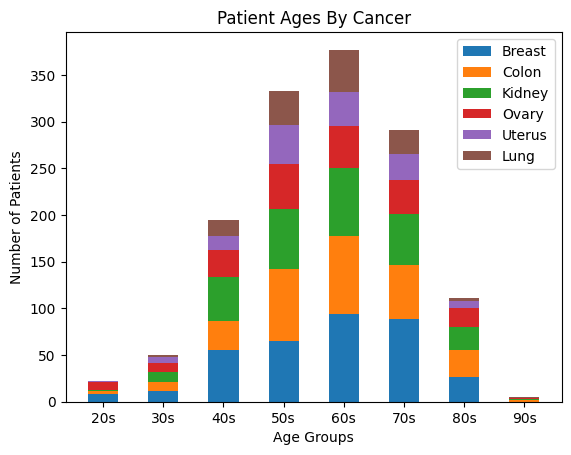

{'Breast': array([ 8, 11, 55, 65, 94, 89, 27,  0]),
 'Colon': array([ 3, 10, 31, 77, 83, 57, 28,  2]),
 'Kidney': array([ 2, 11, 48, 64, 73, 55, 25,  1]),
 'Ovary': array([ 8, 10, 29, 49, 45, 36, 20,  1]),
 'Uterus': array([ 1,  6, 15, 41, 37, 28,  8,  0]),
 'Lung': array([ 0,  2, 17, 37, 45, 26,  3,  1])}

In [35]:
ages = ('20s','30s','40s','50s','60s','70s','80s','90s')
cancers1 = {
    "Breast": BreastAge[0],
    "Colon": ColonAge[0],
    "Kidney" : KidneyAge[0],
    "Ovary" : OvaryAge[0],
    "Uterus" : UterusAge[0],
    "Lung" : LungAge[0]
}

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(8)

for boolean, cancer1 in cancers1.items():
    p = ax.bar(ages, cancer1, width, label=boolean,bottom=bottom)
    bottom += cancer1
   

ax.set_title("Patient Ages By Cancer")
ax.legend(loc="upper right")
ax.set_xlabel("Age Groups")
ax.set_ylabel("Number of Patients")

plt.show()
cancers1

processing, grouping and plotting gender data

In [36]:

def patientGender(data, extra):
    female = 0
    male = 0
    gender1 = []
    index = 0
    other= []
    for x in extra:
        if "Gender:" in x:
            if x == '"Gender: Female"':
                female += 1
            elif x == '"Gender: Male"':
                male += 1
        else: other.append(x) 

    for i in data:
        if "Gender:" in i:
            if i == '"Gender: Female"':
                female += 1
                gender1.append("Female")
            elif i == '"Gender: Male"':
                male += 1
                gender1.append("Male")
        else: 
            other.append([index, i])
            gender1.append("N/A")
        index += 1
    gender = np.array([female, male])
    return gender, other,gender1
sixtypes.iloc[2]

1           "Gender: Male"
4         "Gender: Female"
5           "Gender: Male"
7         "Gender: Female"
8           "Gender: Male"
               ...        
2150      "Gender: Female"
2152      "Gender: Female"
2154      "Gender: Female"
2156      "Gender: Female"
2158    "Gender: Female"\n
Name: 2, Length: 1388, dtype: object

In [37]:
BreastGender = patientGender(breastDD.iloc[2], BreastAge[1])
ColonGender = patientGender(colonDD.iloc[2], ColonAge[1])
KidneyGender = patientGender(kidneyDD.iloc[2], KidneyAge[1])
OvaryGender = patientGender(ovaryDD.iloc[2], OvaryAge[1])
UterusGender = patientGender(uterusDD.iloc[2], UterusAge[1])
LungGender = patientGender(lungDD.iloc[2], LungAge[1])
Gender = patientGender(sixtypes.iloc[2], BreastAge[1])# i just wanttthe index for the genders, the extra doesn't matter, didn't want it to break
ListGender = Gender[1]


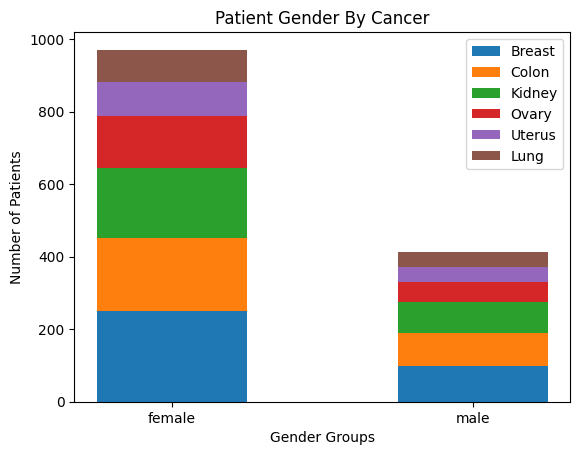

{'Breast': array([251,  98]),
 'Colon': array([200,  92]),
 'Kidney': array([195,  84]),
 'Ovary': array([143,  55]),
 'Uterus': array([93, 43]),
 'Lung': array([89, 42])}

In [38]:
genders = ('female', 'male')

cancers2 = {
    "Breast": BreastGender[0],
    "Colon": ColonGender[0],
    "Kidney": KidneyGender[0],
    "Ovary": OvaryGender[0],
    "Uterus": UterusGender[0],
    "Lung": LungGender[0]
}
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, cancer2 in cancers2.items():
    p = ax.bar(genders, cancer2, width, label=boolean,bottom=bottom)
    bottom += cancer2
 

ax.set_title("Patient Gender By Cancer")
ax.legend(loc="upper right")
ax.set_xlabel("Gender Groups")
ax.set_ylabel("Number of Patients")

plt.show()
cancers2


processing, grouping and plotting ethnic background

In [39]:

def patientEthnicity (data,extra):
    caucasian = 0
    africanAmerican = 0
    asian = 0
    americanIndian = 0
    hispanic = 0
    ethnicOther = 0
    other = []

    for i in extra:
        if "Ethnic Background: " in i:
            if i == '"Ethnic Background: Caucasian"':
                caucasian += 1
            elif i == '"Ethnic Background: African-American"':
                africanAmerican += 1
            elif i == '"Ethnic Background: Asian"':
                asian += 1
            elif i == '"Ethnic Background: American Indian"':
                americanIndian += 1
            elif i == '"Ethnic Background: Hispanic"':
                hispanic += 1
            elif i == '"Ethnic Background: Other"':
                ethnicOther += 1
        else:
            other.append(i)

    for i in data:
        if "Ethnic Background: " in i:
            if i == '"Ethnic Background: Caucasian"':
                caucasian += 1
            elif i == '"Ethnic Background: African-American"':
                africanAmerican += 1
            elif i == '"Ethnic Background: Asian"':
                asian += 1
            elif i == '"Ethnic Background: American Indian"':
                americanIndian += 1
            elif i == '"Ethnic Background: Hispanic"':
                hispanic += 1
            elif i == '"Ethnic Background: Other"':
                ethnicOther += 1
        else:
            other.append(i)
    ethnic = np.array([caucasian,africanAmerican,asian,americanIndian,hispanic,ethnicOther])
    return ethnic,other

In [40]:
BreastEthnic = patientEthnicity(breastDD.iloc[3], BreastGender[1])
ColonEthnic = patientEthnicity(colonDD.iloc[3], ColonGender[1])
KidneyEthnic = patientEthnicity(kidneyDD.iloc[3], KidneyGender[1])
OvaryEthnic = patientEthnicity(ovaryDD.iloc[3], OvaryGender[1])
UterusEthnic = patientEthnicity(uterusDD.iloc[3], UterusGender[1])
LungEthnic = patientEthnicity(lungDD.iloc[3], LungGender[1])
BreastEthnic

(array([315,  19,   4,   6,   3,   1]),
 [[11, '"Primary Site: Lymph Nodes"'],
  [206, '"Gender: Female"'],
  [11, '"Histology: Mature (peripheral) B-cell lymphoma"'],
  [206, '"Ethnic Background: Caucasian"'],
  '"Patient Age: 50-60"',
  '"Tobacco Use : No"',
  '"Tobacco Use : No"'])

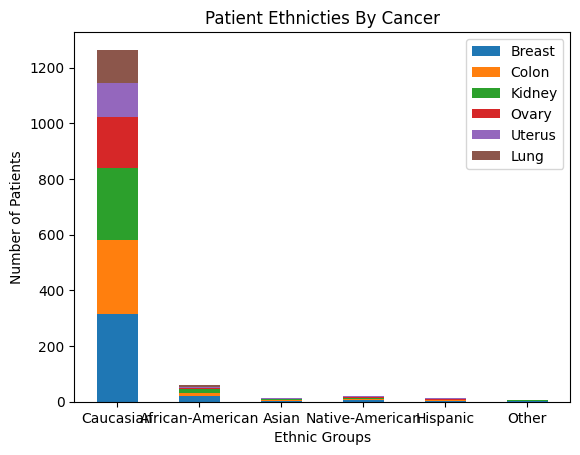

{'Breast': array([315,  19,   4,   6,   3,   1]),
 'Colon': array([267,  13,   3,   5,   2,   0]),
 'Kidney': array([259,  12,   2,   1,   1,   4]),
 'Ovary': array([183,   4,   2,   5,   3,   0]),
 'Uterus': array([121,   6,   2,   3,   4,   0]),
 'Lung': array([119,   7,   1,   2,   2,   0])}

In [41]:
ethnicities = ('Caucasian','African-American','Asian','Native-American','Hispanic','Other')

cancers3 = {
    "Breast": BreastEthnic[0],
    "Colon": ColonEthnic[0],
    "Kidney": KidneyEthnic[0],
    "Ovary": OvaryEthnic[0],
    "Uterus": UterusEthnic[0],
    "Lung": LungEthnic[0]
}
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(6)

for boolean, cancer3 in cancers3.items():
    p = ax.bar(ethnicities, cancer3, width, label=boolean,bottom=bottom)
    bottom += cancer3
 

ax.set_title("Patient Ethnicties By Cancer")
ax.legend(loc="upper right")
ax.set_xlabel("Ethnic Groups",)
ax.set_ylabel("Number of Patients")

plt.show()
cancers3

processing, grouping and plotting tobacco use and years of use

In [42]:
#tobacco use t
def patientAnyTobacco(data,extra):
    noUseTobacco = 0
    yesUseTobacco = 0
    other = []
    anyTobacco1 = []
    for j in extra:
        if "Tobacco Use" in j:
            if j == '"Tobacco Use : Yes"':
                yesUseTobacco += 1
            elif j == '"Tobacco Use : No"':
                noUseTobacco += 1
        else:
            other.append(j)
    for i in data:
        if "Tobacco Use" in i:
            if i == '"Tobacco Use : Yes"':
                yesUseTobacco += 1
                anyTobacco1.append("Yes")
            elif i == '"Tobacco Use : No"':
                noUseTobacco += 1
                anyTobacco1.append("No")
    else:
        other.append(i)
        anyTobacco1.append("N/A")
    anyTobacco = np.array([yesUseTobacco,noUseTobacco])
    return anyTobacco,other,anyTobacco1

sixtypes.iloc[4]

1                 "Tobacco Use : Yes"
4       "Ethnic Background: Hawaiian"
5                 "Tobacco Use : Yes"
7                  "Tobacco Use : No"
8                 "Tobacco Use : Yes"
                    ...              
2150               "Tobacco Use : No"
2152              "Tobacco Use : Yes"
2154              "Tobacco Use : Yes"
2156              "Tobacco Use : Yes"
2158             "Tobacco Use : No"\n
Name: 4, Length: 1388, dtype: object

In [43]:
BreastAT = patientAnyTobacco(breastDD.iloc[4], BreastEthnic[1])
ColonAT = patientAnyTobacco(colonDD.iloc[4],ColonEthnic[1])
KidneyAT = patientAnyTobacco(kidneyDD.iloc[4],KidneyEthnic[1])
OvaryAT = patientAnyTobacco(ovaryDD.iloc[4],OvaryEthnic[1])
UterusAT = patientAnyTobacco(uterusDD.iloc[4],UterusEthnic[1])
LungAT = patientAnyTobacco(lungDD.iloc[4],LungEthnic[1])
AT = patientAnyTobacco(sixtypes.iloc[4], BreastEthnic[1])
AnyTob = AT[2]
AnyTob

['Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Y

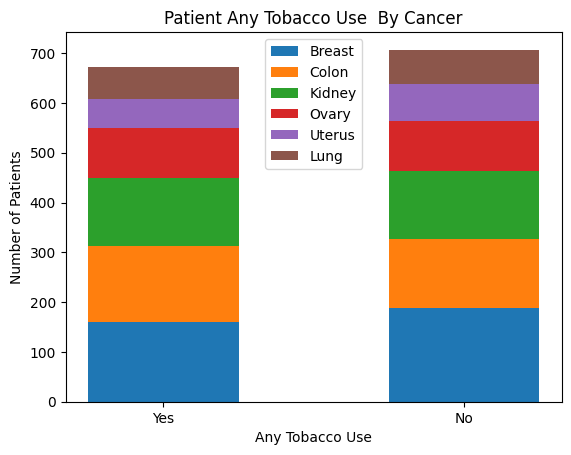

{'Breast': array([160, 189]),
 'Colon': array([153, 138]),
 'Kidney': array([137, 137]),
 'Ovary': array([99, 99]),
 'Uterus': array([60, 76]),
 'Lung': array([63, 68])}

In [44]:
anytobacco = ('Yes','No')
cancers4 = {
    "Breast": BreastAT[0],
    "Colon": ColonAT[0],
    "Kidney": KidneyAT[0],
    "Ovary": OvaryAT[0],
    "Uterus": UterusAT[0],
    "Lung": LungAT[0]
}
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, cancer4 in cancers4.items():
    p = ax.bar(anytobacco, cancer4, width, label=boolean,bottom=bottom)
    bottom += cancer4
 

ax.set_title("Patient Any Tobacco Use  By Cancer")
ax.legend(loc="upper center")
ax.set_xlabel("Any Tobacco Use",)
ax.set_ylabel("Number of Patients")

plt.show()
cancers4

In [45]:

def patientTobacco(data,extra):
    fiveMax = 0
    tenMax = 0
    fifteenMax = 0
    twentyMax = 0
    twentyfiveMax = 0
    thirtyMax = 0
    thirtyfiveMax = 0
    fortyMax = 0
    fortyfiveMax = 0
    fiftyMax = 0
    fiftyfiveMax = 0
    sixtyMax = 0
    sixtyfiveMax = 0
    seventyMax = 0
    tobYear = []
    tobtype =[]

    # teenTobaccoUse = 0 #[11-15, 16-20]
    # twentiesTobaccoUse = 0 #[21-25, 26-30]
    # thirtiesTobaccoUse= 0 #[31-35, 36-40]
    # fortiesTobaccoUse = 0 #[41-45, 46-50]
    # fiftiesTobaccoUse = 0 #[51-55, 56-60]
    # sixtiesTobaccoUse = 0 #[61-65, 66-70]
    pipeTobacco = 0
    chewingTobacco = 0
    cigaretteTobacco = 0
    other = []

    for i in extra:
        if "Years of Tobacco Use" in i:
            if i == '"Years of Tobacco Use: 0-5"':
                fiveMax += 1
            elif i == '"Years of Tobacco Use: 6-10"':
                tenMax += 1
            elif i == '"Years of Tobacco Use: 11-15"':
                fifteenMax += 1
            elif i == '"Years of Tobacco Use: 16-20"':
                twentyMax += 1
            elif i == '"Years of Tobacco Use: 21-25"':
                twentyfiveMax += 1
            elif i == '"Years of Tobacco Use: 26-30"':
                thirtyMax += 1
            elif i == '"Years of Tobacco Use: 31-35"':
                thirtyfiveMax+= 1
            elif i == '"Years of Tobacco Use: 36-40"':
                fortyMax += 1
            elif i == '"Years of Tobacco Use: 41-45"':
                fortyfiveMax += 1
            elif i == '"Years of Tobacco Use: 46-50"':
                fiftyMax += 1
            elif i == '"Years of Tobacco Use: 51-55"':
                fiftyfiveMax += 1
            elif i == '"Years of Tobacco Use: 56-60"':
                sixtyMax += 1
            elif i == '"Years of Tobacco Use: 61-65"':
                sixtyfiveMax += 1
            elif i == '"Years of Tobacco Use: 66-70"':
                seventyMax += 1
        elif "Type of Tobacco Use" in i:
            if i == '"Type of Tobacco Use: Pipe"':
                pipeTobacco += 1
            elif i == '"Type of Tobacco Use: Chewing Tobacco"':
                chewingTobacco += 1
            elif i == '"Type of Tobacco Use: Cigarettes"':
                cigaretteTobacco += 1
        else:
            other.append(i)    

    for i in data:
        if "Years of Tobacco Use" in i:
            if i == '"Years of Tobacco Use: 0-5"':
                fiveMax += 1
                tobYear.append("0-5")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 6-10"':
                tenMax += 1
                tobYear.append("6-10")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 11-15"':
                fifteenMax += 1
                tobYear.append("11-15")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 16-20"':
                twentyMax += 1
                tobYear.append("16-20")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 21-25"':
                twentyfiveMax += 1
                tobYear.append("21-25")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 26-30"':
                thirtyMax += 1
                tobYear.append("26-30")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 31-35"':
                thirtyfiveMax+= 1
                tobYear.append("31-35")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 36-40"':
                fortyMax += 1
                tobYear.append("36-40")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 41-45"':
                fortyfiveMax += 1
                tobYear.append("41-45")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 46-50"':
                fiftyMax += 1
                tobYear.append("46-50")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 51-55"':
                fiftyfiveMax += 1
                tobYear.append("51-55")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 56-60"':
                sixtyMax += 1
                tobYear.append("56-60")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 61-65"':
                sixtyfiveMax += 1
                tobYear.append("61-65")
                tobtype.append("N/A")
            elif i == '"Years of Tobacco Use: 66-70"':
                seventyMax += 1
                tobYear.append("66-70")
                tobtype.append("N/A")
        elif "Type of Tobacco Use" in i:
            if i == '"Type of Tobacco Use: Pipe"':
                pipeTobacco += 1
                tobtype.append("Pipe")
            elif i == '"Type of Tobacco Use: Chewing Tobacco"':
                chewingTobacco += 1
                tobtype.append("Chewing Tobacco")
            elif i == '"Type of Tobacco Use: Cigarettes"':
                cigaretteTobacco += 1
                tobtype.append("Cigarettes")
        else:
            other.append(i) 
            tobYear.append("N/A")
             
    tobaccoExp = np.array([fiveMax,tenMax,fifteenMax,twentyMax,twentyfiveMax,thirtyMax,thirtyfiveMax,
    fortyMax,fortyfiveMax,fiftyMax,fiftyfiveMax,sixtyMax,sixtyfiveMax,seventyMax])
    tobaccoType = np.array([pipeTobacco,chewingTobacco,cigaretteTobacco])
    return tobaccoExp, tobaccoType, other,tobYear
    
def patientTobacco2(data,extra):
    tenYears = 0 #[0-5.6-10]
    twentyYears = 0 #[11-15, 16-20]
    thirtyYears = 0 #[21-25, 26-30]
    fortyYears =  0 #[31-35, 36-40]
    fiftyYears = 0 #[41-45, 46-50]
    sixtyYears= 0 #[51-55, 56-60]
    seventyYears = 0 #[61-65, 66-70]
    pipeTobacco = 0
    chewingTobacco = 0
    cigaretteTobacco = 0
    other = []

    for i in extra:
        if "Years of Tobacco Use" in i:
            if i == '"Years of Tobacco Use: 0-5"'or i == '"Years of Tobacco Use: 6-10"':
                tenYears += 1
            elif i == '"Years of Tobacco Use: 11-15"' or i == '"Years of Tobacco Use: 16-20"':
                twentyYears += 1
            elif i == '"Years of Tobacco Use: 21-25"' or i == '"Years of Tobacco Use: 26-30"':
                thirtyYears += 1
            elif i == '"Years of Tobacco Use: 31-35"' or i == '"Years of Tobacco Use: 36-40"':
                fortyYears += 1 
            elif i == '"Years of Tobacco Use: 41-45"' or i == '"Years of Tobacco Use: 46-50"':
                fiftyYears += 1
            elif i == '"Years of Tobacco Use: 51-55"' or i == '"Years of Tobacco Use: 56-60"':
                sixtyYears += 1
            elif i == '"Years of Tobacco Use: 61-65"' or i == '"Years of Tobacco Use: 66-70"':
                seventyYears += 1
        elif "Type of Tobacco Use" in i:
            if i == '"Type of Tobacco Use: Pipe"':
                pipeTobacco += 1
            elif i == '"Type of Tobacco Use: Chewing Tobacco"':
                chewingTobacco += 1
            elif i == '"Type of Tobacco Use: Cigarettes"':
                cigaretteTobacco += 1
        else:
            other.append(i)    

    for i in data:
        if "Years of Tobacco Use" in i:
            if i == '"Years of Tobacco Use: 0-5"'or i == '"Years of Tobacco Use: 6-10"':
                tenYears += 1
            elif i == '"Years of Tobacco Use: 11-15"' or i == '"Years of Tobacco Use: 16-20"':
                twentyYears += 1
            elif i == '"Years of Tobacco Use: 21-25"' or i == '"Years of Tobacco Use: 26-30"':
                thirtyYears += 1
            elif i == '"Years of Tobacco Use: 31-35"' or i == '"Years of Tobacco Use: 36-40"':
                fortyYears += 1 
            elif i == '"Years of Tobacco Use: 41-45"' or i == '"Years of Tobacco Use: 46-50"':
                fiftyYears += 1
            elif i == '"Years of Tobacco Use: 51-55"' or i == '"Years of Tobacco Use: 56-60"':
                sixtyYears += 1
            elif i == '"Years of Tobacco Use: 61-65"' or i == '"Years of Tobacco Use: 66-70"':
                seventyYears += 1
        elif "Type of Tobacco Use" in i:
            if i == '"Type of Tobacco Use: Pipe"':
                pipeTobacco += 1
            elif i == '"Type of Tobacco Use: Chewing Tobacco"':
                chewingTobacco += 1
            elif i == '"Type of Tobacco Use: Cigarettes"':
                cigaretteTobacco += 1
        else:
            other.append(i)
             
    tobaccoExp = np.array([tenYears,twentyYears,thirtyYears,fortyYears,fiftyYears,sixtyYears,seventyYears])
    tobaccoType = np.array([pipeTobacco,chewingTobacco,cigaretteTobacco])
    return tobaccoExp, tobaccoType, other

In [46]:
BreastTobacco = patientTobacco(breastDD.iloc[5], BreastAT[1])
ColonTobacco = patientTobacco(colonDD.iloc[5], ColonAT[1])
KidneyTobacco = patientTobacco(kidneyDD.iloc[5], KidneyAT[1])
OvaryTobacco = patientTobacco(ovaryDD.iloc[5], OvaryAT[1])
UterusTobacco = patientTobacco(uterusDD.iloc[5], UterusAT[1])
LungTobacco = patientTobacco(lungDD.iloc[5], LungAT[1])
TobaccoYear = patientTobacco(sixtypes.iloc[5], BreastAT[1])

BreastTobacco2 = patientTobacco2(breastDD.iloc[5], BreastAT[1])
ColonTobacco2 = patientTobacco2(colonDD.iloc[5], ColonAT[1])
KidneyTobacco2 = patientTobacco2(kidneyDD.iloc[5], KidneyAT[1])
OvaryTobacco2 = patientTobacco2(ovaryDD.iloc[5], OvaryAT[1])
UterusTobacco2 = patientTobacco2(uterusDD.iloc[5], UterusAT[1])
LungTobacco2 = patientTobacco2(lungDD.iloc[5], LungAT[1])

ListTobYear =TobaccoYear[3]
ListTobYear

['N/A',
 '46-50',
 'N/A',
 '31-35',
 'N/A',
 '16-20',
 '11-15',
 'N/A',
 '0-5',
 'N/A',
 'N/A',
 '0-5',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '16-20',
 'N/A',
 'N/A',
 '0-5',
 'N/A',
 '36-40',
 '16-20',
 'N/A',
 'N/A',
 '56-60',
 'N/A',
 '36-40',
 '46-50',
 '16-20',
 'N/A',
 '6-10',
 '26-30',
 '46-50',
 '0-5',
 'N/A',
 'N/A',
 '31-35',
 'N/A',
 'N/A',
 '46-50',
 'N/A',
 '26-30',
 'N/A',
 'N/A',
 '6-10',
 '46-50',
 '16-20',
 'N/A',
 'N/A',
 '6-10',
 '36-40',
 '36-40',
 '0-5',
 '26-30',
 'N/A',
 '36-40',
 'N/A',
 '36-40',
 '31-35',
 '16-20',
 '26-30',
 '36-40',
 'N/A',
 '21-25',
 'N/A',
 '31-35',
 '16-20',
 '6-10',
 '26-30',
 '11-15',
 '21-25',
 '16-20',
 'N/A',
 '16-20',
 'N/A',
 'N/A',
 '6-10',
 '0-5',
 '31-35',
 '31-35',
 '41-45',
 'N/A',
 '11-15',
 '6-10',
 '41-45',
 '6-10',
 '6-10',
 'N/A',
 'N/A',
 'N/A',
 '16-20',
 '31-35',
 'N/A',
 '0-5',
 '16-20',
 'N/A',
 '46-50',
 '36-40',
 'N/A',
 'N/A',
 'N/A',
 '16-20',
 'N/A',
 '11-15',
 '36-40',
 'N/A',
 '46-50',
 'N/A',
 'N/A'

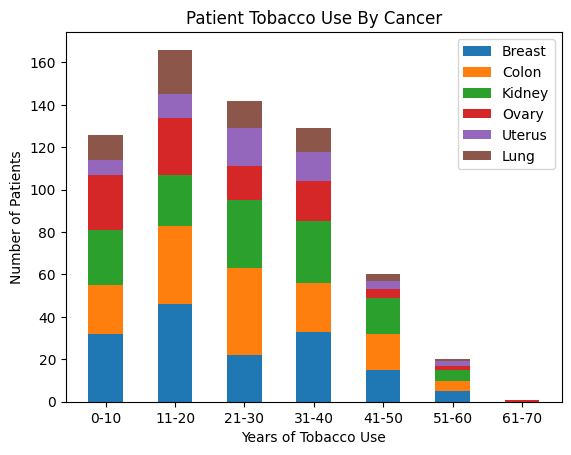

{'Breast': array([32, 46, 22, 33, 15,  5,  0]),
 'Colon': array([23, 37, 41, 23, 17,  5,  0]),
 'Kidney': array([26, 24, 32, 29, 17,  5,  0]),
 'Ovary': array([26, 27, 16, 19,  4,  2,  1]),
 'Uterus': array([ 7, 11, 18, 14,  4,  2,  0]),
 'Lung': array([12, 21, 13, 11,  3,  1,  0])}

In [47]:
tobaccoExp = ('0-10','11-20','21-30','31-40','41-50','51-60','61-70')
cancers5 = {
    "Breast": BreastTobacco2[0],
    "Colon": ColonTobacco2[0],
    "Kidney": KidneyTobacco2[0],
    "Ovary": OvaryTobacco2[0],
    "Uterus": UterusTobacco2[0],
    "Lung": LungTobacco2[0]
}
width = 0.50
fig, ax = plt.subplots()
bottom = np.zeros(7)

for boolean, cancer5 in cancers5.items():
    p = ax.bar(tobaccoExp, cancer5, width, label=boolean,bottom=bottom)
    bottom += cancer5
 

ax.set_title("Patient Tobacco Use By Cancer")
ax.legend(loc="upper right")
ax.set_xlabel("Years of Tobacco Use")
# ax.xticks(rotation=45)
ax.set_ylabel("Number of Patients")

plt.show()
cancers5

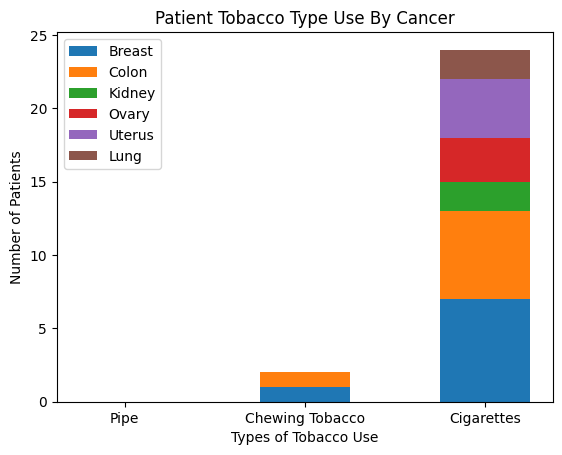

{'Breast': array([0, 1, 7]),
 'Colon': array([0, 1, 6]),
 'Kidney': array([0, 0, 2]),
 'Ovary': array([0, 0, 3]),
 'Uterus': array([0, 0, 4]),
 'Lung': array([0, 0, 2])}

In [48]:
tobaccoExp = ('Pipe','Chewing Tobacco','Cigarettes')
cancers6 = {
    "Breast": BreastTobacco2[1],
    "Colon": ColonTobacco2[1],
    "Kidney": KidneyTobacco2[1],
    "Ovary": OvaryTobacco2[1],
    "Uterus": UterusTobacco2[1],
    "Lung": LungTobacco2[1]
}
width = 0.50
fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, cancer6 in cancers6.items():
    p = ax.bar(tobaccoExp, cancer6, width, label=boolean,bottom=bottom)
    bottom += cancer6
 

ax.set_title("Patient Tobacco Type Use By Cancer")
ax.legend(loc="upper left")
ax.set_xlabel("Types of Tobacco Use")
# ax.xticks(rotation=45)
ax.set_ylabel("Number of Patients")

plt.show()
cancers6

In [49]:
ListAge1 = ListAge.copy()
ListAge1.append("N/A")
len(copyC2G1)

Cancer2 = Cancers.copy()

maybe delete later ... random code

In [50]:
# cAge = pd.DataFrame(CancerList,copyC2G1, ListAge, columns=["Cancer", "ID","Age"])
cAge = Cancer2.assign(Age = ListAge1) #listAge1, had an extra column
print(len(cAge))
cAge.dropna(subset=['Age'])
len(cAge)

# cGender = pd.DataFrame(CancerList, copyC2G1, ListGender)
# cTobacco = pd.DataFrame(CancerList, copyC2G1, AnyTob)
# cYear = pd.DataFrame(CancerList, copyC2G1, ListTobYear)
# cAge.to_csv("CO-Age.csv")
# cGender.to_csv("CO-Gender.csv")
# cTobacco.to_csv("CO-Tobacco.csv")
# cYear.to_csv("CO-Year.csv")

1388


1388

In [51]:
# with open("GS-series-matrix.txt","r") as text:
#     lines = text.readlines()

# filtered_lines = lines[115:]

# text.close()

# with open("GS-series-matrix-DO.txt", "w") as new_file:
#     new_file.writelines(filtered_lines)


In [52]:

# this took like 20 minutes and no result. don't run it. something is wrong with it.
# matrix = pd.read_excel('GS-series-matrix.xlsx', index_col=0) 

In [53]:
# matrix2 = pd.read_csv('GS-series-matrix.csv')